In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix, f1_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
scantron_reading38_encoded_df = pd.read_csv('../dataframes/scantronReading_38_encoded.csv')

Scantron Reading encoded, label is proficent score

In [22]:
scantron_reading38_encoded_df.head(10)

,studentId,level,dataSource,is_proficient,proficient_score,school_Elementary A,school_Elementary School B,school_Elementary School E,school_Elementary School F,school_Intermediate School E,school_Middle School A,school_Middle School C,school_Middle School D,school_Middle School F,iready_math,iready_reading,past_proficient_score,subject_math,subject_reading,subject_science,subject_social-studies,subject_music,subject_art,subject_performing-arts,subject_phys-ed,subject_career-prep
0,44777,7,value_scantronReading,False,0.993342,False,False,False,False,False,True,False,False,False,0,0,0.969279,2,2,2,2,1,0,0,0,0
1,44783,7,value_scantronReading,False,0.997179,False,False,False,False,False,True,False,False,False,0,0,1.009665,2,2,2,1,0,0,0,0,0
2,44784,6,value_scantronReading,False,0.947277,False,False,False,False,False,True,False,False,False,0,0,0.934354,2,2,2,2,1,0,0,0,0
3,44807,7,value_scantronReading,True,1.014669,False,False,False,False,False,True,False,False,False,0,0,1.028650,2,2,1,2,0,0,0,0,0
4,44809,7,value_scantronReading,False,0.934665,False,False,False,False,False,True,False,False,False,0,0,0.949085,2,2,2,2,1,0,0,0,0
5,44810,7,value_scantronReading,False,0.924283,False,False,False,False,False,True,False,False,False,0,0,0.915602,2,2,2,2,1,0,0,0,0
6,44811,7,value_scantronReading,False,0.904988,False,False,False,False,False,True,False,False,False,0,0,0.852261,2,2,1,2,0,0,0,0,0
7,44812,7,value_scantronReading,False,0.436696,False,False,False,False,False,False,False,False,False,0,0,0.655506,0,0,0,0,0,0,0,0,0
8,44814,7,value_scantronReading,True,1.012074,False,False,False,False,False,True,False,False,False,0,0,0.998274,2,2,1,2,1,0,0,0,0
9,44815,6,value_scantronReading,False,0.948086,False,False,False,False,False,True,False,False,False,0,0,0.946146,2,2,2,2,1,0,0,0,0


In [23]:
scantron_reading38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                      bool
proficient_score                float64
school_Elementary A                bool
school_Elementary School B         bool
school_Elementary School E         bool
school_Elementary School F         bool
school_Intermediate School E       bool
school_Middle School A             bool
school_Middle School C             bool
school_Middle School D             bool
school_Middle School F             bool
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [24]:
#turning bools in one hot encoded rows to 0 and 1
scantron_reading38_encoded_df[scantron_reading38_encoded_df.select_dtypes(include=['bool']).columns] = scantron_reading38_encoded_df.select_dtypes(include=['bool']).astype(int)
scantron_reading38_encoded_df.dtypes

studentId                         int64
level                             int64
dataSource                       object
is_proficient                     int32
proficient_score                float64
school_Elementary A               int32
school_Elementary School B        int32
school_Elementary School E        int32
school_Elementary School F        int32
school_Intermediate School E      int32
school_Middle School A            int32
school_Middle School C            int32
school_Middle School D            int32
school_Middle School F            int32
iready_math                       int64
iready_reading                    int64
past_proficient_score           float64
subject_math                      int64
subject_reading                   int64
subject_science                   int64
subject_social-studies            int64
subject_music                     int64
subject_art                       int64
subject_performing-arts           int64
subject_phys-ed                   int64


In [25]:
print(scantron_reading38_encoded_df.isnull().sum())  

studentId                          0
level                              0
dataSource                         0
is_proficient                      0
proficient_score                   0
school_Elementary A                0
school_Elementary School B         0
school_Elementary School E         0
school_Elementary School F         0
school_Intermediate School E       0
school_Middle School A             0
school_Middle School C             0
school_Middle School D             0
school_Middle School F             0
iready_math                        0
iready_reading                     0
past_proficient_score           5280
subject_math                       0
subject_reading                    0
subject_science                    0
subject_social-studies             0
subject_music                      0
subject_art                        0
subject_performing-arts            0
subject_phys-ed                    0
subject_career-prep                0
dtype: int64


In [26]:
#dropping rows that are missing past proficient score
scantron_reading38_encoded_df = scantron_reading38_encoded_df.dropna(subset=['past_proficient_score'])
print(scantron_reading38_encoded_df.isnull().sum()) 

studentId                       0
level                           0
dataSource                      0
is_proficient                   0
proficient_score                0
school_Elementary A             0
school_Elementary School B      0
school_Elementary School E      0
school_Elementary School F      0
school_Intermediate School E    0
school_Middle School A          0
school_Middle School C          0
school_Middle School D          0
school_Middle School F          0
iready_math                     0
iready_reading                  0
past_proficient_score           0
subject_math                    0
subject_reading                 0
subject_science                 0
subject_social-studies          0
subject_music                   0
subject_art                     0
subject_performing-arts         0
subject_phys-ed                 0
subject_career-prep             0
dtype: int64


In [27]:
y_Read38En = scantron_reading38_encoded_df['proficient_score']
X_Read38En= scantron_reading38_encoded_df.drop(['proficient_score','is_proficient','studentId','dataSource','level'],  axis=1)
print("Number of examples: " + str(X_Read38En.shape[0]))
X_train_Read38En,X_test_Read38En, y_train_Read38En,y_test_Read38En = train_test_split(X_Read38En,y_Read38En, test_size=0.30, random_state=123)
print(X_train_Read38En.shape)
print(X_test_Read38En.shape)

Number of examples: 15180
(10626, 21)
(4554, 21)


In [28]:
#setting up the param grid, possible hyperparameter for max_depth and min_samples_leaf
max_depth_values_Read38En = [8,12,25,32]
min_samples_leaf_values_Read38En = [4,5,8,10]
param_grid_Read38En = {'max_depth' : list(max_depth_values_Read38En), 'min_samples_leaf' : list(min_samples_leaf_values_Read38En)}

#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressor_Read38En = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid_Read38En = GridSearchCV(dt_regressor_Read38En, param_grid_Read38En, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search_Read38En = dt_grid_Read38En.fit(X_train_Read38En, y_train_Read38En)

print("Done")
dt_best_params_Read38En = dt_grid_search_Read38En.best_params_

dt_best_params_Read38En

#{'max_depth': 8, 'min_samples_leaf': 10}


Running Grid Search
Done


{'max_depth': 8, 'min_samples_leaf': 10}

In [29]:
dt_model_Read38En = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
dt_model_Read38En.fit(X_train_Read38En,y_train_Read38En)

#testing model on the X_test
y_dt_pred_Read38En = dt_model_Read38En.predict(X_test_Read38En)
dt_rmse_Read38En = mean_squared_error(y_test_Read38En,y_dt_pred_Read38En,squared=False)
dt_r2_Read38En= r2_score(y_test_Read38En,y_dt_pred_Read38En)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_read_bool = y_dt_pred_Read38En >= threshold
y_test_read_bool = y_test_Read38En >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_read_bool, y_pred_read_bool))

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse_Read38En))
print('[DT] R2: {0}'.format(dt_r2_Read38En))


threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.91      0.90      2782
        True       0.85      0.82      0.83      1772

    accuracy                           0.87      4554
   macro avg       0.87      0.86      0.86      4554
weighted avg       0.87      0.87      0.87      4554

[DT] Root Mean Squared Error: 0.0701822160720789
[DT] R2: 0.6001496523675779


In [30]:
#looking at the micro score
micro_f1 = f1_score(y_test_read_bool, y_pred_read_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.8722002635046113


Confusion Matrix:
[[2520  262]
 [ 320 1452]]


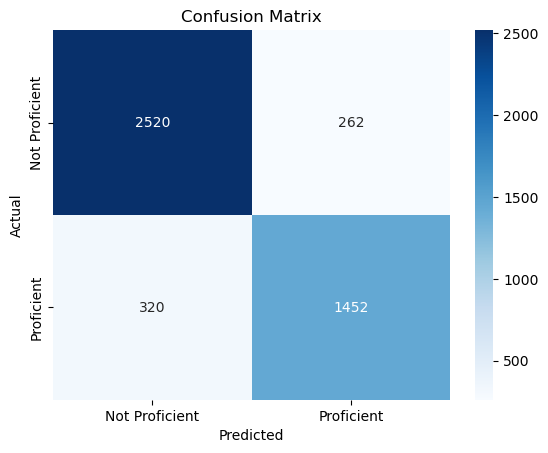

In [31]:
cm = confusion_matrix(y_test_read_bool, y_pred_read_bool)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optionally, plot the confusion matrix using seaborn heatmap for better visualization
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Proficient", "Proficient"], yticklabels=["Not Proficient", "Proficient"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Feature Importance

In [ ]:
importances = dt_model_Read38En.feature_importances_
feature_names = X_train_Read38En.columns

# Combine names and importances, and sort
importance_dfRead = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_dfRead= importance_dfRead.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_dfRead)

                         Feature  Importance
11         past_proficient_score    0.980743
15        subject_social-studies    0.009321
3     school_Elementary School F    0.002366
19               subject_phys-ed    0.002099
9                    iready_math    0.001965
8         school_Middle School F    0.000992
5         school_Middle School A    0.000581
7         school_Middle School D    0.000532
4   school_Intermediate School E    0.000476
2     school_Elementary School E    0.000433
1     school_Elementary School B    0.000133
12                  subject_math    0.000121
14               subject_science    0.000121
6         school_Middle School C    0.000119
0            school_Elementary A    0.000000
17                   subject_art    0.000000
18       subject_performing-arts    0.000000
10                iready_reading    0.000000
16                 subject_music    0.000000
13               subject_reading    0.000000
20           subject_career-prep    0.000000


w/o past_proficient 

In [34]:
y= scantron_reading38_encoded_df['proficient_score']
X= scantron_reading38_encoded_df.drop(['proficient_score','is_proficient','studentId','dataSource','level','past_proficient_score'],  axis=1)
print("Number of examples: " + str(X.shape[0]))
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=123)
print(X_train.shape)
print(X_test.shape)

Number of examples: 15180
(10626, 20)
(4554, 20)


In [36]:
#setting up the param grid, possible hyperparameter for max_depth and min_samples_leaf
max_depth_values = [8,12,25,32]
min_samples_leaf = [4,5,8,10]
param_grid = {'max_depth' : list(max_depth_values), 'min_samples_leaf' : list(min_samples_leaf)}

#Grid Search to find the best hyperparameters 
print("Running Grid Search")
dt_regressor = DecisionTreeRegressor()

# will have a 3-fold cross validation 
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error')
dt_grid_search = dt_grid.fit(X_train, y_train)

print("Done")
dt_best_params = dt_grid_search.best_params_

dt_best_params_Read38En
#{'max_depth': 8, 'min_samples_leaf': 10}

Running Grid Search
Done


{'max_depth': 8, 'min_samples_leaf': 10}

In [37]:
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=10)
dt_model.fit(X_train,y_train)

#testing model on the X_test
y_dt_pred = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test,y_dt_pred,squared=False)
dt_r2= r2_score(y_test,y_dt_pred)

#trying to get f1 and accuracy score 
threshold = 1
y_pred_bool = y_dt_pred >= threshold
y_test_bool = y_test >= threshold

print("threshold=", threshold)
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test_bool, y_pred_bool))

print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

threshold= 1

Classification Report:
              precision    recall  f1-score   support

       False       0.61      1.00      0.76      2782
        True       0.65      0.01      0.02      1772

    accuracy                           0.61      4554
   macro avg       0.63      0.50      0.39      4554
weighted avg       0.63      0.61      0.47      4554

[DT] Root Mean Squared Error: 0.11065589314784754
[DT] R2: 0.005986188137553805


In [39]:
#looking at the micro score
micro_f1 = f1_score(y_test_bool, y_pred_bool, average='micro')

print("Micro F1 Score:", micro_f1)

Micro F1 Score: 0.6128678085199825


In [41]:
importances2 = dt_model.feature_importances_
feature_names2 = X_train.columns

# Combine names and importances, and sort
importance_df = pd.DataFrame({'Feature': feature_names2, 'Importance': importances2})
importance_df= importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted DataFrame
print(importance_df)

                         Feature  Importance
9                    iready_math    0.221414
15                 subject_music    0.128227
13               subject_science    0.128141
5         school_Middle School A    0.126291
2     school_Elementary School E    0.123212
3     school_Elementary School F    0.095439
14        subject_social-studies    0.059004
8         school_Middle School F    0.045606
7         school_Middle School D    0.042650
18               subject_phys-ed    0.018193
1     school_Elementary School B    0.011824
0            school_Elementary A    0.000000
17       subject_performing-arts    0.000000
16                   subject_art    0.000000
10                iready_reading    0.000000
12               subject_reading    0.000000
11                  subject_math    0.000000
6         school_Middle School C    0.000000
4   school_Intermediate School E    0.000000
19           subject_career-prep    0.000000
